In [53]:
#let's import required libraries

import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt, joblib
from scipy.stats import zscore,boxcox
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.metrics import accuracy_score,roc_curve,auc,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [54]:
#Loading Dataset
df=pd.read_csv('Bias_correction_ucl.csv')

In [55]:
#Let's preview
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [56]:
#let's check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [57]:
df['Date'].nunique()

310

In [58]:
df['Date']=pd.to_datetime(df['Date'])

In [59]:
df['Month']=df['Date'].dt.month

In [60]:
df['Year']=df['Date'].dt.year

In [61]:
df['Month'].nunique()

3

In [62]:
df['Year'].nunique()

5

In [63]:
df=df.drop('Date',axis=1)

In [64]:
df.isna().sum()

station              2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
Month                2
Year                 2
dtype: int64

In [65]:
df=df.dropna()

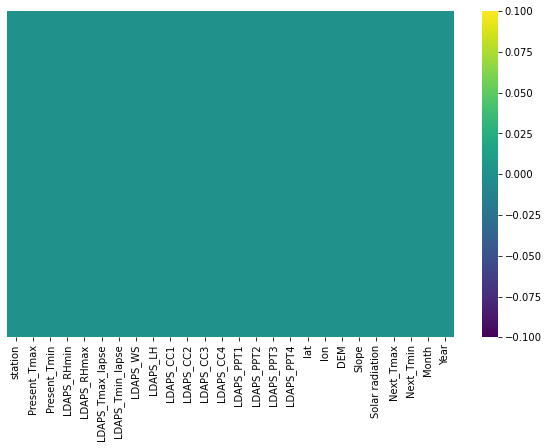

In [66]:
#get correlation of features in dataset
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(),yticklabels=False,cmap='viridis')
plt.show()

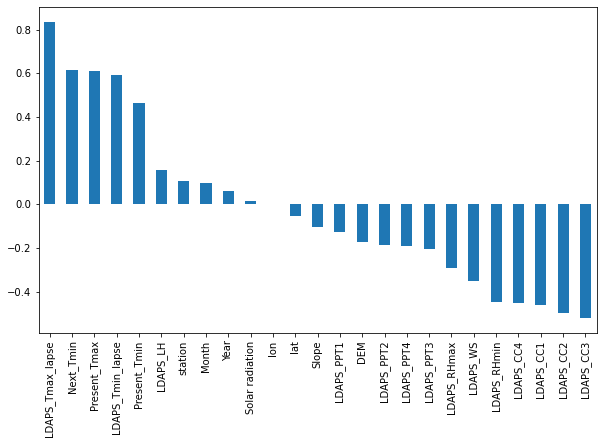

In [67]:
#let's check correlation
plt.figure(figsize=(10,6))
df.corr()['Next_Tmax'].drop('Next_Tmax').sort_values(ascending=False).plot(kind='bar')
plt.show()

In [68]:
#
zs=zscore(df)
df=df[((zs<3) & (zs>-3)).all(axis=1)]

In [69]:
df.shape

(6739, 26)

In [70]:
df.skew()

station            -0.001594
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.686083
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            1.085685
LDAPS_LH            0.567050
LDAPS_CC1           0.594835
LDAPS_CC2           0.505774
LDAPS_CC3           0.701288
LDAPS_CC4           0.708754
LDAPS_PPT1          3.724580
LDAPS_PPT2          4.854967
LDAPS_PPT3          5.516862
LDAPS_PPT4          5.924324
lat                 0.106983
lon                -0.277547
DEM                 1.764698
Slope               1.590130
Solar radiation    -0.520157
Next_Tmax          -0.267526
Next_Tmin          -0.234328
Month              -0.168571
Year                0.025066
dtype: float64

In [71]:
#
pt=PowerTransformer()

In [72]:
for x in df.columns.drop('Next_Tmax'):
    if abs(df.loc[:,x].skew())>0.55:
        df.loc[:,x]=pt.fit_transform(df.loc[:,x].values.reshape(-1,1))

In [73]:
scale=MinMaxScaler()

In [74]:
X=df.drop('Next_Tmax',axis=1)
y=df['Next_Tmax']

In [75]:
X=scale.fit_transform(X)

In [78]:
def model(mod):
    maxscore=0
    maxsstate=0
    for x in range(42,105):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=x)
        md=mod()
        md.fit(X_train,y_train)
        predict=md.predict(X_test)
        r2score=r2_score(y_test,predict)
        if r2score>maxscore:
            maxscore=r2score
            maxsstate=x
    print("Max score is {} and maxstate is {}".format(maxscore,maxsstate))

In [79]:
model(LinearRegression)

Max score is 0.8002695714604104 and maxstate is 43


In [80]:
model(RandomForestRegressor)

Max score is 0.9016961719350141 and maxstate is 86


In [81]:
model(Ridge)

Max score is 0.7999611306850062 and maxstate is 43


In [82]:
model(ElasticNet)

Max score is 0 and maxstate is 0


In [83]:
model(Lasso)

Max score is 0 and maxstate is 0


In [84]:
model(KNeighborsRegressor)

Max score is 0.8342386477496809 and maxstate is 92


In [85]:
model(AdaBoostRegressor)

Max score is 0.7820479599377944 and maxstate is 93


In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=86)

In [87]:
params={'n_estimators':[100,130,150,170,190,210,230,250,270,290,310,330,350,370,430,470,500]}

In [88]:
gscv=GridSearchCV(RandomForestRegressor(),params)

In [89]:
gscv.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [100, 130, 150, 170, 190, 210, 230,
                                          250, 270, 290, 310, 330, 350, 370,
                                          430, 470, 500]})

In [90]:
gscv.best_params_

{'n_estimators': 170}

In [91]:
rf=RandomForestRegressor(n_estimators=170)
rf.fit(X_train,y_train)
predict=rf.predict(X_test)

In [92]:
print("R2 score is {}".format(r2_score(y_test,predict)))
print()
print("MAE score is {}".format(mean_absolute_error(y_test,predict)))
print()
print("RMSE score is {}".format(np.sqrt(mean_squared_error(y_test,predict))))

R2 score is 0.9031945366814107

MAE score is 0.6855485611510794

RMSE score is 0.9088607891308585


In [93]:
cross_val_score(rf,X_train,y_train,cv=4).mean()

0.875185582415688